In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from itertools import combinations
from sklearn.decomposition import PCA

In [3]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 1.0000


In [6]:
# Random Forest Classifier
rf_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_classifier = rf_grid_search.best_estimator_
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Best Random Forest Parameters:", rf_grid_search.best_params_)


Random Forest Accuracy: 1.0000
Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 150}


In [7]:
# AdaBoost Classifier
adaboost_param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
adaboost_grid_search = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42), param_grid=adaboost_param_grid, cv=5)
adaboost_grid_search.fit(X_train, y_train)
adaboost_classifier = adaboost_grid_search.best_estimator_
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"AdaBoost Accuracy: {adaboost_accuracy:.4f}")
print("Best AdaBoost Parameters:", adaboost_grid_search.best_params_)

AdaBoost Accuracy: 1.0000
Best AdaBoost Parameters: {'learning_rate': 0.01, 'n_estimators': 50}


In [8]:
# Gradient Boosting Classifier
gb_param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
gb_classifier = gb_grid_search.best_estimator_
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)

Gradient Boosting Accuracy: 1.0000
Best Gradient Boosting Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [9]:
# Cross-validation scores
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
adaboost_cv_scores = cross_val_score(adaboost_classifier, X, y, cv=5)
gb_cv_scores = cross_val_score(gb_classifier, X, y, cv=5)

In [10]:
print("Cross-validation scores:")
print(f"Decision Tree: {np.mean(dt_cv_scores):.4f}")
print(f"Random Forest: {np.mean(rf_cv_scores):.4f}")
print(f"AdaBoost: {np.mean(adaboost_cv_scores):.4f}")
print(f"Gradient Boosting: {np.mean(gb_cv_scores):.4f}")

Cross-validation scores:
Decision Tree: 0.9533
Random Forest: 0.9667
AdaBoost: 0.9533
Gradient Boosting: 0.9600


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

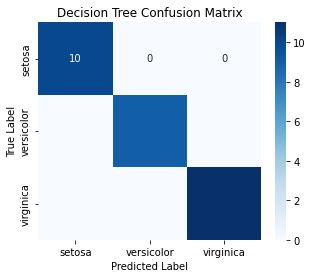

In [12]:
# Decision Tree
plot_confusion_matrix(y_test, dt_predictions, title='Decision Tree Confusion Matrix')

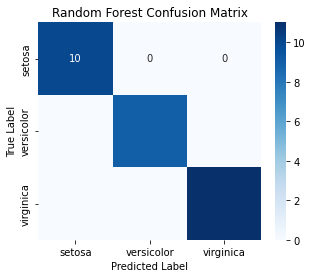

In [13]:
# Random Forest
plot_confusion_matrix(y_test, rf_predictions, title='Random Forest Confusion Matrix')

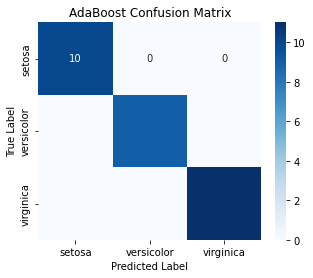

In [14]:
# AdaBoost
plot_confusion_matrix(y_test, adaboost_predictions, title='AdaBoost Confusion Matrix')

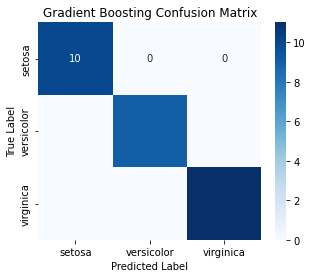

In [15]:
# Gradient Boosting
plot_confusion_matrix(y_test, gb_predictions, title='Gradient Boosting Confusion Matrix')

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate classifier performance and print metrics
def evaluate_classifier_performance(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{classifier_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")

In [17]:
# Evaluate Decision Tree performance
evaluate_classifier_performance(y_test, dt_predictions, "Decision Tree")

Decision Tree Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000




In [18]:
# Evaluate Random Forest performance
evaluate_classifier_performance(y_test, rf_predictions, "Random Forest")

Random Forest Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000




In [19]:
# Evaluate AdaBoost performance
evaluate_classifier_performance(y_test, adaboost_predictions, "AdaBoost")

AdaBoost Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000




In [20]:
# Evaluate Gradient Boosting performance
evaluate_classifier_performance(y_test, gb_predictions, "Gradient Boosting")

Gradient Boosting Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000




In [21]:
# Additional checks
# 1. Display the unique values in your test labels to ensure it has more than one class.
print("Unique classes in y_test:", np.unique(y_test))

# 2. Print the first few elements of your y_test and predictions arrays for manual inspection.
print("y_test:", y_test[:10])
print("dt_predictions:", dt_predictions[:10])
print("rf_predictions:", rf_predictions[:10])
print("adaboost_predictions:", adaboost_predictions[:10])
print("gb_predictions:", gb_predictions[:10])

Unique classes in y_test: [0 1 2]
y_test: [1 0 2 1 1 0 1 2 1 1]
dt_predictions: [1 0 2 1 1 0 1 2 1 1]
rf_predictions: [1 0 2 1 1 0 1 2 1 1]
adaboost_predictions: [1 0 2 1 1 0 1 2 1 1]
gb_predictions: [1 0 2 1 1 0 1 2 1 1]
